In [1]:
# Here we demonstarte How to Implement a circuit which returns |00> and |11> with equal probability.
# We are going to use Qiskit to demonstarte this Problem
# At the core, It is about acheiving entanglement, which we can acheive by cnot gate.

In [6]:
# import qiskit lib 
from qiskit import *
from qiskit import IBMQ
%config InlineBackend.figure_format = 'svg'
# import bloch sphere to visulaize what the sate of quibit
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

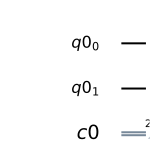

In [7]:
quantum_registers = QuantumRegister(2)
classical_registers = ClassicalRegister(2)

# create a circuit with above created Registers 
quantum_circuit = QuantumCircuit(quantum_registers, classical_registers)

%matplotlib inline
quantum_circuit.draw(output='mpl')



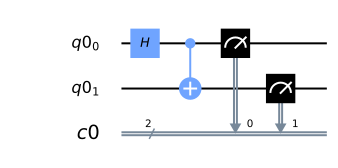

In [8]:
# As initial qubits will be in state 0, it won't be much intetersting so push qubits to superposition using H gate
# Then apply cnot which is actually controlled not 

quantum_circuit.h(0)
quantum_circuit.cx(0,1)
quantum_circuit.measure(quantum_registers[0],classical_registers[0])
quantum_circuit.measure(quantum_registers[1],classical_registers[1])
# Our Final circuit looks like below mentioned circuit 
%matplotlib inline
quantum_circuit.draw(output='mpl')

In [9]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

C:\Users\bhara\.conda\envs\qc-mentorship-tasks\lib\site-packages\qiskit\providers\aer\noise\device\basic_device_model.py:112: DeprecationWarning: This function is been deprecated and moved to a method of the`NoiseModel` class. For equivalent functionality use `NoiseModel.from_backend(properties, **kwargs).
  DeprecationWarning)


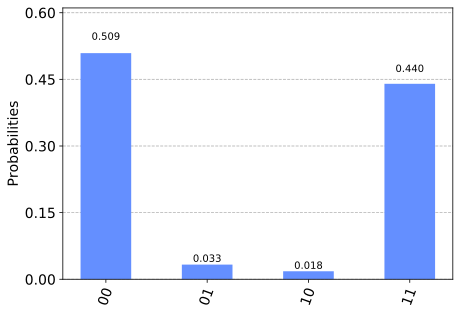

In [13]:
# Execute the circuit in qasm simulator
real_device = provider.get_backend('ibmq_16_melbourne')
simulator = Aer.get_backend('qasm_simulator')
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

from qiskit.providers.aer import noise

noise_model = noise.device.basic_device_noise_model(properties)

result = execute(quantum_circuit,simulator,shots=1000, noise_model=noise_model,
                    coupling_map=coupling_map,
                    basis_gates=noise_model.basis_gates).result()

plot_histogram(result.get_counts())

In [12]:
# AS we started our state with 0, hadamard will turn it to |0> -> |+>
# so we are almost sure that it will turn into 00>+|11> but not 00>-|11> 